In [125]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import keras

In [126]:
import warnings

**load the dataset into train_test_split method**

In [128]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [129]:
x_train.shape

(50000, 32, 32, 3)

In [130]:
y_train.shape

(50000, 1)

In [131]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [132]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [133]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [134]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [135]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

**scale the dataset in 0 to 1**

In [137]:
x_train=x_train/255

In [138]:
x_test=x_test/255

In [139]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [140]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

**lets do one hot encoding for y_train and test data**

In [142]:
y_train_categorical = keras.utils.to_categorical(#this func helps to do one hot encoding by using keras 
    y_train, num_classes=10#, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10#, dtype='float32'
)

In [143]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [144]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [145]:
y_test=y_test.reshape(-1, )

In [146]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [147]:
y_train=y_train.reshape(-1,)

In [148]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [149]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [150]:
classes=['airplane','automobile','bird','cat','deer','frog','horse','ship','truck']

In [151]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

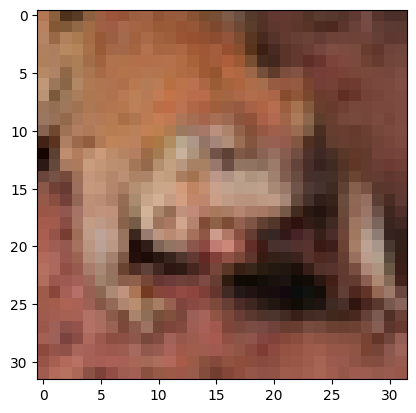

In [162]:
plt.imshow(x_test[5])


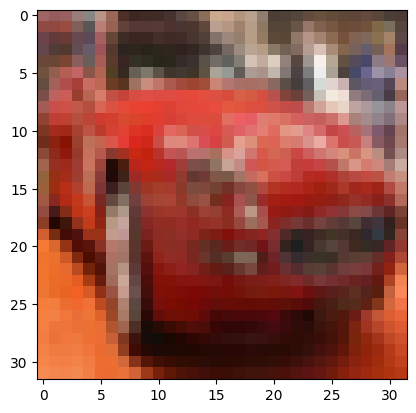

In [153]:
plt.imshow(x_train[5])

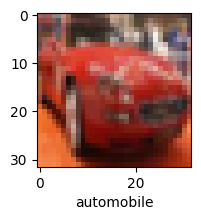

In [161]:
plot_sample(x_train,y_train,5)

**build artificial neural network**

In [196]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3048 - loss: 1.9253


In [197]:
ann.evaluate(x_test,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3951 - loss: 1.6973


[1.6990605592727661, 0.3930000066757202]

In [198]:
classes[np.argmax(ann.predict(x_test)[5])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


'horse'

In [199]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.54      0.46      1000
           1       0.57      0.41      0.48      1000
           2       0.34      0.03      0.05      1000
           3       0.23      0.70      0.34      1000
           4       0.41      0.36      0.38      1000
           5       0.54      0.13      0.21      1000
           6       0.48      0.35      0.40      1000
           7       0.53      0.40      0.45      1000
           8       0.42      0.68      0.52      1000
           9       0.58      0.34      0.43      1000

    accuracy                           0.39     10000
   macro avg       0.45      0.39      0.37     10000
weighted avg       0.45      0.39      0.37     10000



** now build CNN**

In [203]:
cnn = models.Sequential([
    #CNN layer here we have convolutioonal +relu +pooling layer and can be done multiple times.
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #dense layer in which we will have our neural networks and join all the networks find the o/p.
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3807 - loss: 1.7002


In [207]:
cnn.evaluate(x_test,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5662 - loss: 1.2376


[1.2433404922485352, 0.5605999827384949]

In [217]:
classes[np.argmax(cnn.predict(x_test)[3])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


'truck'

In [209]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.9818313e-02, 1.4874148e-03, 2.2195560e-01, 4.5115092e-01,
        5.7904120e-03, 2.0593758e-01, 2.9014759e-02, 2.9455689e-03,
        4.0723268e-02, 1.1761526e-03],
       [1.3036959e-01, 4.0223658e-01, 1.5563998e-04, 6.0284638e-05,
        1.8401202e-04, 1.1685313e-06, 5.7592201e-06, 1.8815053e-05,
        4.5293823e-01, 1.4029886e-02],
       [2.1967599e-01, 1.8519601e-01, 1.2585326e-02, 5.1304814e-03,
        3.5984311e-03, 6.5221003e-04, 3.4814986e-04, 2.2064643e-03,
        5.2779967e-01, 4.2807259e-02],
       [3.5509866e-01, 4.2750802e-02, 8.8514891e-03, 1.3446750e-03,
        2.2141864e-03, 9.2968941e-05, 9.1104346e-05, 3.3095016e-04,
        5.8608669e-01, 3.1385189e-03],
       [3.8788239e-03, 3.2311664e-03, 1.5922315e-01, 2.0475863e-01,
        1.8236235e-01, 1.8673487e-01, 2.3964477e-01, 6.9001773e-03,
        1.1572597e-02, 1.6934130e-03]], dtype=float32)

In [210]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [211]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

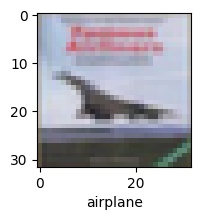

In [213]:
plot_sample(x_test, y_test,3)

In [214]:
classes[y_classes[3]]

'truck'